# Data Analysis for Crime in San Francisco
The San Francisco crime dataset covers incidents in 2016. The analysis is conducted through data visualization tools and crosstabulation.

In [ ]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium

In [2]:
# Read data and shape
data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
data.shape

(150500, 13)

In [3]:
# How data looks like
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [4]:
# Create a column for month
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Month'] 

0          1
1          1
2          4
3          1
4          1
          ..
150495    12
150496    12
150497    12
150498    12
150499    12
Name: Month, Length: 150500, dtype: int64

In [5]:
# Check missing values
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Month         0
dtype: int64

In [6]:
# Fill the missing value in PdDistrict using the mode values
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)
data.isnull().any().any()

False

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


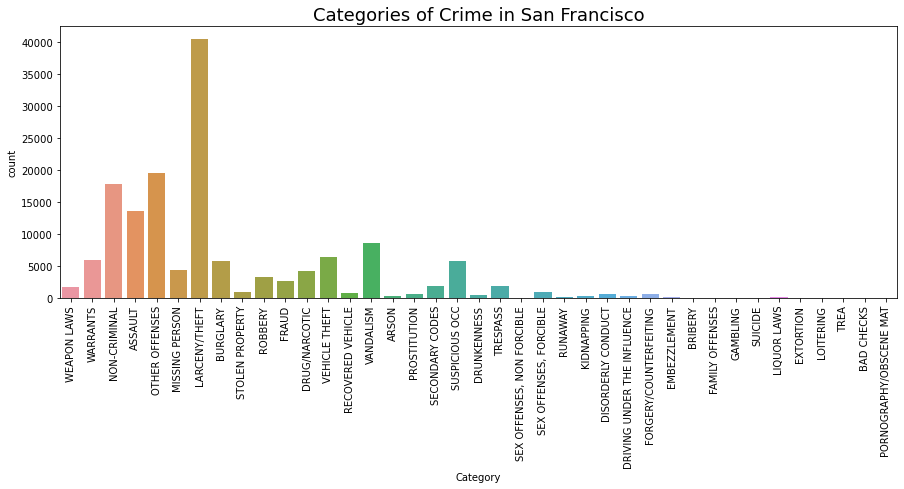

In [7]:
# Plot categories of crime and their distribution
plt.figure(figsize=(15,5))
sns.countplot(data['Category'])
plt.title('Categories of Crime in San Francisco', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


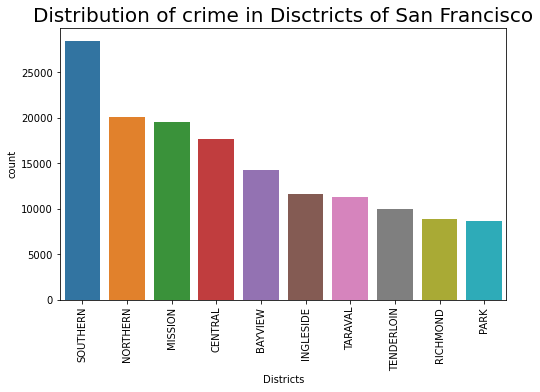

In [8]:
# Plot distribution of crime in disctricts
plt.figure(figsize=(8, 5))
sns.countplot(data['PdDistrict'], order = data['PdDistrict'].value_counts().index)
plt.title('Distribution of crime in Disctricts of San Francisco', fontsize = 20)
plt.xticks(rotation = 90)
plt.xlabel('Districts')
plt.show()

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


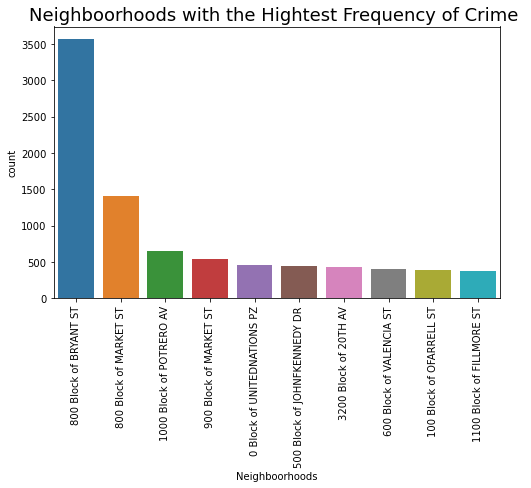

In [9]:
# Plot distribution of crime in the highest 10 neigborhoods

plt.figure(figsize=(8, 5))
sns.countplot(data['Address'], order= data['Address'].value_counts().head(10).index)
plt.title('Neighboorhoods with the Hightest Frequency of Crime ', fontsize = 18)
plt.xlabel('Neighboorhoods')
plt.xticks(rotation = 90)
plt.show()

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


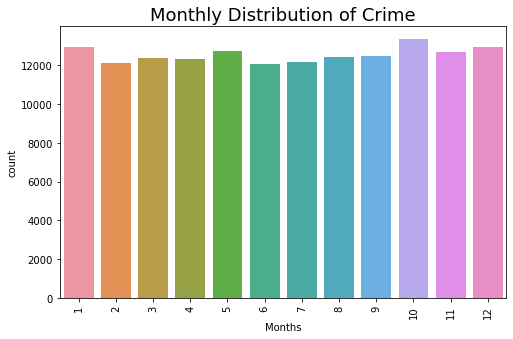

In [10]:
# Plot monthly distribution of crime
plt.figure(figsize=(8, 5))
sns.countplot(data['Month'])
plt.title('Monthly Distribution of Crime', fontsize = 18)
plt.xlabel('Months')
plt.xticks(rotation = 90)
plt.show()

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


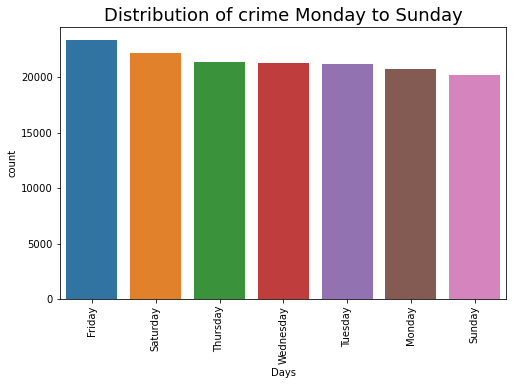

In [11]:
# Plot weekly distribution of crime
plt.figure(figsize=(8, 5))
sns.countplot(data['DayOfWeek'], order= data['DayOfWeek'].value_counts().index)
plt.title('Distribution of crime Monday to Sunday', fontsize = 18)
plt.xlabel('Days')
plt.xticks(rotation = 90)
plt.show()

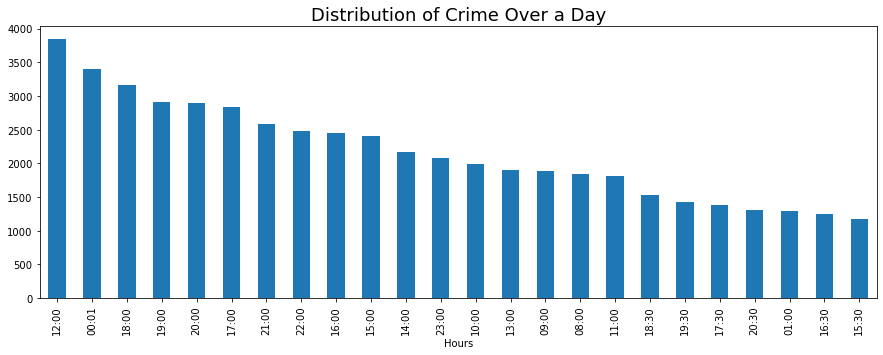

In [12]:
# Plot distribution of crime over a day
data['Time'].value_counts().head(24).plot.bar(figsize=(15, 5))
plt.title('Distribution of Crime Over a Day', fontsize = 18)
plt.xlabel('Hours')
plt.xticks(rotation = 90)
plt.show()

C:\Users\murat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


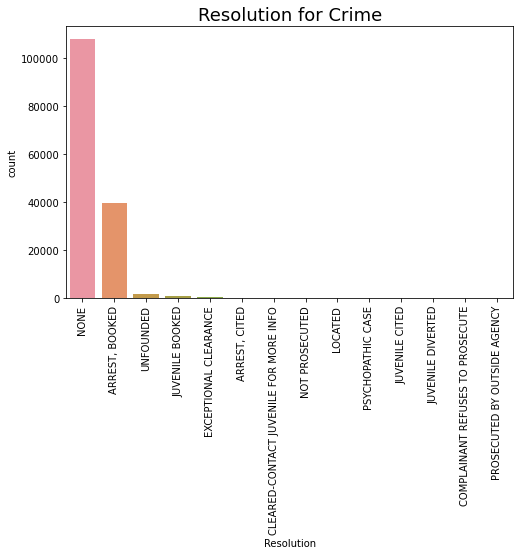

In [13]:
# Plot distribution for the resolution of crime
plt.figure(figsize=(8, 5))
sns.countplot(data['Resolution'], order= data['Resolution'].value_counts().index)
plt.title('Resolution for Crime', fontsize = 18)
plt.xticks(rotation = 90)
plt.show()

## Crosstabulation

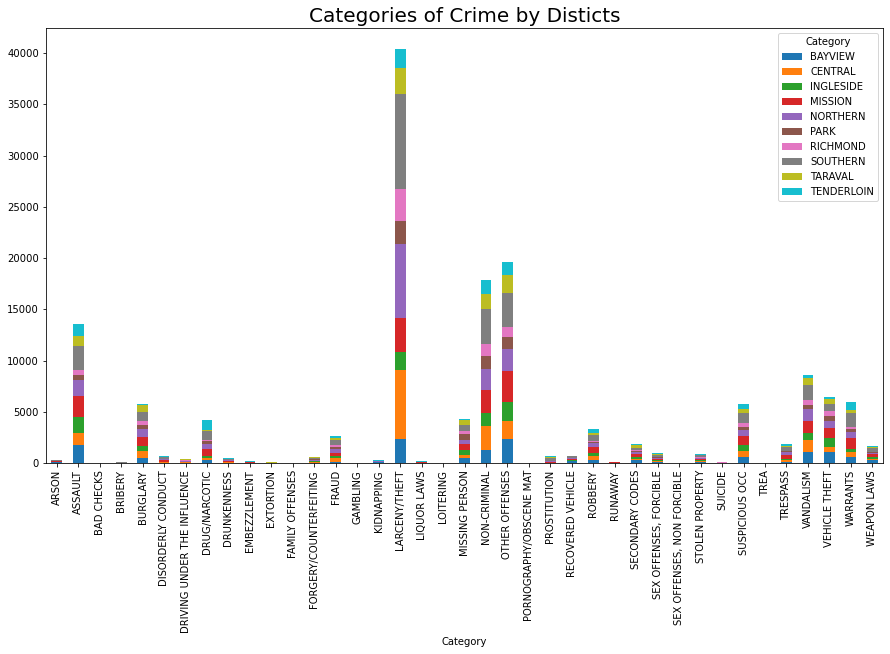

In [14]:
# Plot the crosstabulation of category of crime and district 
crimebydistrict = pd.crosstab(data['Category'], data['PdDistrict'])
crimebydistrict.plot.bar(stacked=True, figsize=(15,8))
plt.title('Categories of Crime by Disticts', fontweight = 30, fontsize = 20)
plt.legend(title='Category')
plt.xticks(rotation = 90)
plt.show()

plt.show()

## Crime mapping

In [15]:
# Define the map of San Francisco
sfr_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)
# Define the json file for the districts of San Francisco
sf_json =  'https://cocl.us/sanfran_geojson'

In [16]:
# Create a table for crime rates and indexing districts
crimeindistricts = data.PdDistrict.value_counts()

table = pd.DataFrame(data=crimeindistricts.values, index=crimeindistricts.index, columns=['Count'])
table = table.reindex(["SOUTHERN", "NORTHERN", "MISSION", "CENTRAL", "BAYVIEW", "INGLESIDE", 
                       "TARAVAL", "TENDERLOIN", "RICHMOND", "PARK"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

In [17]:
# Generate a crime map feeding with the table
sfr_map.choropleth(
    geo_data=sf_json,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rates in Districts of San Francisco'
    )

sfr_map


C:\Users\murat\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
